**HUDM5199 - Spring 2022**

**Yutong Shen, ys3453**

**HW8 - April 19, 2022**

## Session 10

### 1.1 DataFrames - Descriptive Statistics

In [199]:
pd.set_option('precision', 2)

In [205]:
grades_dict = {'Wally': [87, 96, 70], 'Eva': [100, 87, 90], 
               'Sam': [94, 77, 90], 'Katie': [100, 81, 82], 
               'Bob': [83, 65, 85]}
grades = pd.DataFrame(grades_dict)
grades.index = ['Test1', 'Test2', 'Test3']
grades.at['Test2', 'Eva'] = 100
grades.iat[1, 2] = 87
grades.describe()

,Wally,Eva,Sam,Katie,Bob
count,3.00,3.00,3.00,3.00,3.00
mean,84.33,96.67,90.33,87.67,77.67
std,13.20,5.77,3.51,10.69,11.02
min,70.00,90.00,87.00,81.00,65.00
25%,78.50,95.00,88.50,81.50,74.00
50%,87.00,100.00,90.00,82.00,83.00
75%,91.50,100.00,92.00,91.00,84.00
max,96.00,100.00,94.00,100.00,85.00


In [206]:
grades.mean()

Wally    84.33
Eva      96.67
Sam      90.33
Katie    87.67
Bob      77.67
dtype: float64

### 1.2 Import excel files

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Employee_Attrition_Dataset_excel.xlsx')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,...,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,2,2,Female,94,3,4,...,8,Yes,3,1,8,0,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,1,3,Male,61,2,2,...,1,No,4,4,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,4,Male,92,2,3,...,6,Yes,3,2,7,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,4,4,Female,56,3,3,...,1,Yes,3,3,8,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,1,1,Male,40,3,2,...,9,No,3,4,6,3,2,2,2,2


### 1.2 Grouping

In [4]:
columns_to_show = ['EnvironmentSatisfaction', 'HourlyRate', 'JobSatisfaction']
df.groupby(['Gender'])[columns_to_show].describe()

EnvironmentSatisfaction                                               \
                         count      mean       std  min  25%  50%  75%  max   
Gender                                                                        
Female                   588.0  2.721088  1.085963  1.0  2.0  3.0  4.0  4.0   
Male                     882.0  2.722222  1.098417  1.0  2.0  3.0  4.0  4.0   

       HourlyRate             ...              JobSatisfaction            \
            count       mean  ...   75%    max           count      mean   
Gender                        ...                                          
Female      588.0  65.903061  ...  83.0  100.0           588.0  2.683673   
Male        882.0  65.883220  ...  84.0  100.0           882.0  2.758503   

                                           
             std  min  25%  50%  75%  max  
Gender                                     
Female  1.096038  1.0  2.0  3.0  4.0  4.0  
Male    1.106970  1.0  2.0  3.0  4.0  4.0  

[2 rows x 24 columns]

In [5]:
df.groupby(['Gender'])[columns_to_show].describe(percentiles=[])

EnvironmentSatisfaction                                    HourlyRate  \
                         count      mean       std  min  50%  max      count   
Gender                                                                         
Female                   588.0  2.721088  1.085963  1.0  3.0  4.0      588.0   
Male                     882.0  2.722222  1.098417  1.0  3.0  4.0      882.0   

                                                JobSatisfaction            \
             mean        std   min   50%    max           count      mean   
Gender                                                                      
Female  65.903061  20.580067  30.0  67.0  100.0           588.0  2.683673   
Male    65.883220  20.172327  30.0  65.0  100.0           882.0  2.758503   

                                 
             std  min  50%  max  
Gender                           
Female  1.096038  1.0  3.0  4.0  
Male    1.106970  1.0  3.0  4.0

In [6]:
import numpy as np
df.groupby(['Gender'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

EnvironmentSatisfaction                     HourlyRate                  \
                          mean       std amin amax       mean        std amin   
Gender                                                                          
Female                2.721088  1.085963    1    4  65.903061  20.580067   30   
Male                  2.722222  1.098417    1    4  65.883220  20.172327   30   

            JobSatisfaction                      
       amax            mean       std amin amax  
Gender                                           
Female  100        2.683673  1.096038    1    4  
Male    100        2.758503  1.106970    1    4

**Question: What about if we want to know the average, minimum, maximum of age, hourly rate and monthly income by department and gender?**

In [7]:
columns_to_show = ['Age', 'HourlyRate', 'MonthlyIncome']
df.groupby(['Department', 'Gender'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Age                     HourlyRate  \
                                    mean       std amin amax       mean   
Department             Gender                                             
Human Resources        Female  37.650000  9.879671   25   59  54.350000   
                       Male    37.883721  9.026968   19   59  68.930233   
Research & Development Female  37.366755  9.241043   18   60  65.517150   
                       Male    36.831615  9.140093   18   60  66.591065   
Sales                  Female  37.222222  9.300156   18   60  67.899471   
                       Male    36.042802  8.815498   18   60  63.770428   

                                                   MonthlyIncome               \
                                     std amin amax          mean          std   
Department             Gender                                                   
Human Resources        Female  20.050660   30   98   7264.000000  6143.404756   
                       Male    20.865094   36  100   6371.023256  5668.652996   
Research & Development Female  20.361978   30  100   6513.691293  4808.354321   
                       Male    20.181819   30  100   6129.888316  4950.209893   
Sales                  Female  20.728371   30  100   6972.126984  4285.461006   
                       Male    19.934606   31  100   6949.645914  3892.068876   

                                            
                               amin   amax  
Department             Gender               
Human Resources        Female  2109  19658  
                       Male    1555  19717  
Research & Development Female  1129  19973  
                       Male    1009  19999  
Sales                  Female  1200  19845  
                       Male    1052  19847

### 1.3 Summary Tables

In [8]:
pd.crosstab(index = df['Gender'], columns = df['Department'])

Department,Human Resources,Research & Development,Sales
Gender,,,
Female,20,379,189
Male,43,582,257


In [9]:
pd.crosstab(df['Gender'], df['Department'], normalize=True)

Department,Human Resources,Research & Development,Sales
Gender,,,
Female,0.013605,0.257823,0.128571
Male,0.029252,0.395918,0.174830


### 1.4 Pivot Tables in Python

In [11]:
df.pivot_table(values = ['EnvironmentSatisfaction', 'HourlyRate', 'JobSatisfaction'],
               index = ['Gender'], 
               aggfunc = 'mean')

,EnvironmentSatisfaction,HourlyRate,JobSatisfaction
Gender,,,
Female,2.721088,65.903061,2.683673
Male,2.722222,65.883220,2.758503


In [12]:
df.pivot_table(['EnvironmentSatisfaction', 'HourlyRate', 'JobSatisfaction'],
               ['Attrition'], 
               aggfunc = 'mean')

,EnvironmentSatisfaction,HourlyRate,JobSatisfaction
Attrition,,,
No,2.771290,65.952149,2.778589
Yes,2.464135,65.573840,2.468354


In [13]:
# Multilevel Pivot Tables
df.pivot_table(values = ['EnvironmentSatisfaction', 'HourlyRate', 'JobSatisfaction'],
               index = ['Gender', 'Attrition'], 
               aggfunc = 'mean')

EnvironmentSatisfaction  HourlyRate  JobSatisfaction
Gender Attrition                                                      
Female No                        2.782435   66.089820         2.728543
       Yes                       2.367816   64.827586         2.425287
Male   No                        2.763661   65.857923         2.812842
       Yes                       2.520000   66.006667         2.493333

In [14]:
age = pd.cut(df['Age'], [18, 35, 80])
df.pivot_table(values = 'JobSatisfaction', index = ['Gender', age], columns = 'Attrition')

Attrition              No       Yes
Gender Age                         
Female (18, 35]  2.799065  2.317460
       (35, 80]  2.669014  2.652174
Male   (18, 35]  2.814815  2.548387
       (35, 80]  2.807895  2.388889

In [15]:
age.head()

0    (35, 80]
1    (35, 80]
2    (35, 80]
3    (18, 35]
4    (18, 35]
Name: Age, dtype: category
Categories (2, interval[int64, right]): [(18, 35] < (35, 80]]

### 1.5 Quick Visualization

In [16]:
# Set up plotting
import matplotlib as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

<AxesSubplot:xlabel='Department', ylabel='count'>

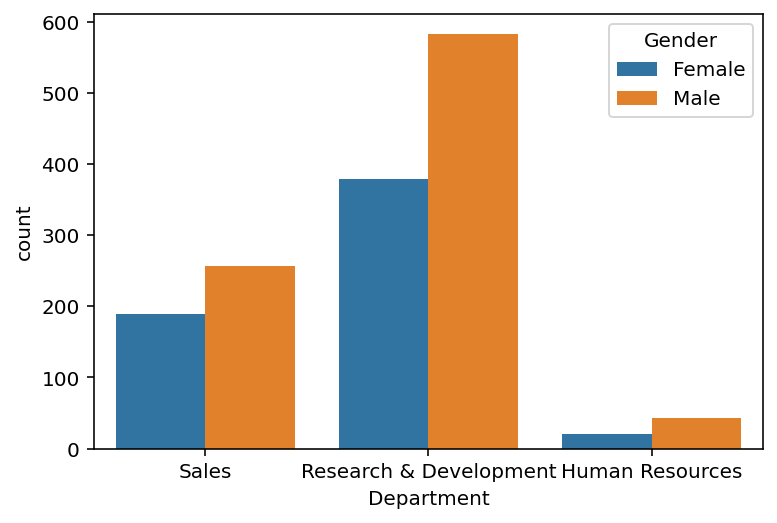

In [17]:
sns.countplot(x = 'Department', hue = 'Gender', data = df)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

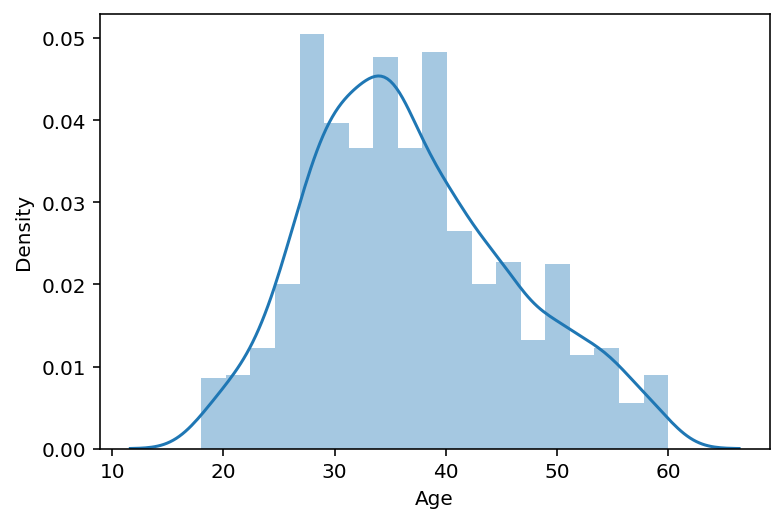

In [26]:
sns.distplot(df.Age.dropna())

### 2. Data Visualization

## Session 11

### 3. Examples

* Target variable: survived
* We want to know the relationship or information between target variable and other factors

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# To show graphs within Python notebook include inline directive:
%matplotlib inline

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

### 3.1 Bar Plots

In [6]:
titanic.groupby('pclass').survived.count()

pclass
1    216
2    184
3    491
Name: survived, dtype: int64

<AxesSubplot:xlabel='pclass'>

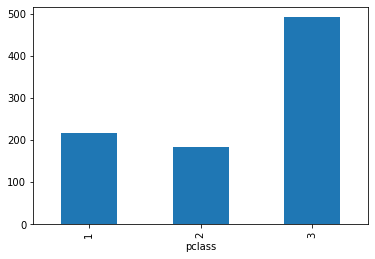

In [7]:
titanic.groupby('pclass').survived.count().plot(kind='bar')

In [8]:
titanic.groupby('pclass').survived.sum()

pclass
1    136
2     87
3    119
Name: survived, dtype: int64

<AxesSubplot:xlabel='pclass'>

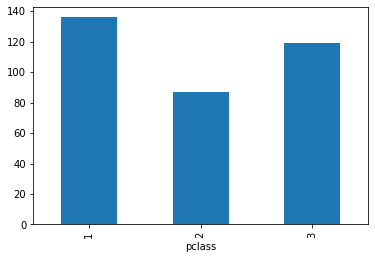

In [9]:
titanic.groupby('pclass').survived.sum().plot(kind='bar')

<AxesSubplot:xlabel='pclass'>

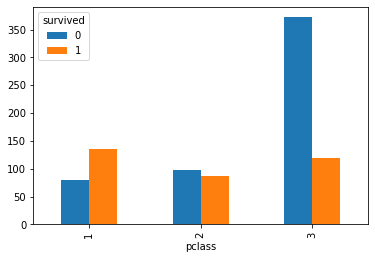

In [10]:
pd.crosstab(index = titanic.pclass, columns = titanic.survived).plot(kind='bar')

In [11]:
pd.crosstab(index = titanic.pclass, columns = titanic.survived)

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='pclass', ylabel='count'>

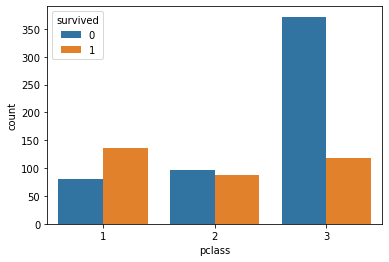

In [12]:
sns.countplot(x = 'pclass', hue = 'survived', data = titanic)

* Three variables:

In [13]:
# for each sex and plcass, how many observations survived
titanic.groupby(['sex', 'pclass']).survived.sum()

sex     pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: survived, dtype: int64

<AxesSubplot:ylabel='sex,pclass'>

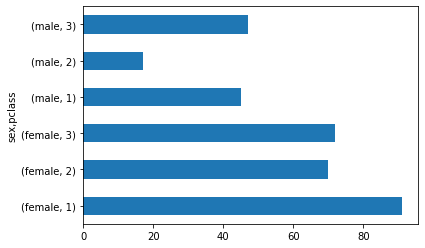

In [14]:
titanic.groupby([titanic.pclass, titanic.sex]).survived.sum().plot(kind='barh')

**How to use crosstab method to produce this table?**

In [20]:
death_counts = pd.crosstab(index = [titanic.pclass, titanic.sex], columns = titanic.survived)
death_counts

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

In [22]:
death_counts = pd.crosstab(index = [titanic.pclass, titanic.sex], columns = titanic.survived.astype(bool))
death_counts

survived       False  True
pclass sex                
1      female      3    91
       male       77    45
2      female      6    70
       male       91    17
3      female     72    72
       male      300    47

### 3.1 Stacked Bar Plots

<AxesSubplot:xlabel='pclass,sex'>

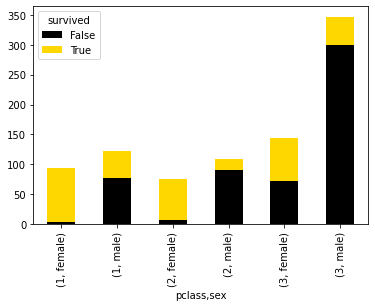

In [23]:
death_counts.plot(kind='bar', stacked=True, color=['black', 'gold'], grid=False)

### 3.1 Normalized Stacked Bar Plots

In [26]:
death_counts.div(death_counts.sum(1).astype(float), axis=0)

survived          False      True
pclass sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447

<AxesSubplot:ylabel='pclass,sex'>

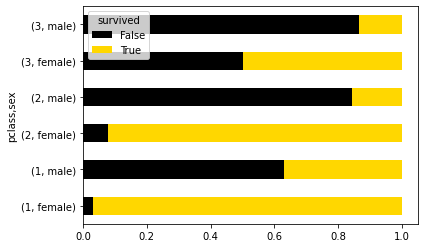

In [27]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black', 'gold'])

### 3.2 Pie Charts

<AxesSubplot:ylabel='survived'>

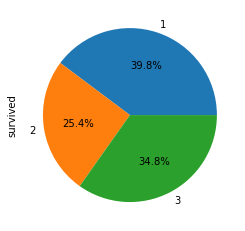

In [88]:
titanic.groupby('pclass').survived.sum().plot(kind='pie', autopct='%1.1f%%')

### 3.3 Histogram

<AxesSubplot:>

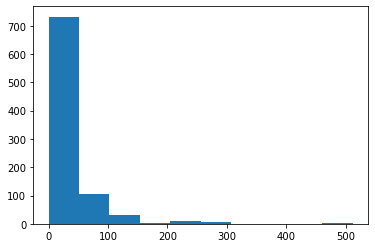

In [29]:
titanic.fare.hist(grid=False)

<AxesSubplot:>

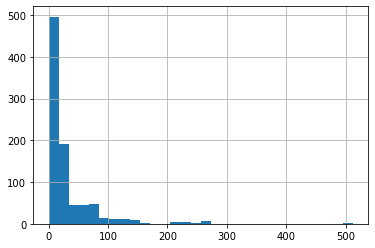

In [30]:
titanic.fare.hist(bins=30)

**Histgrams using Pandas with Seaborn**

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

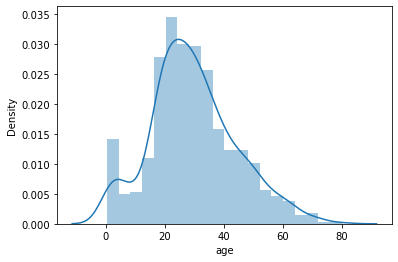

In [89]:
sns.distplot(titanic.age.dropna())

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

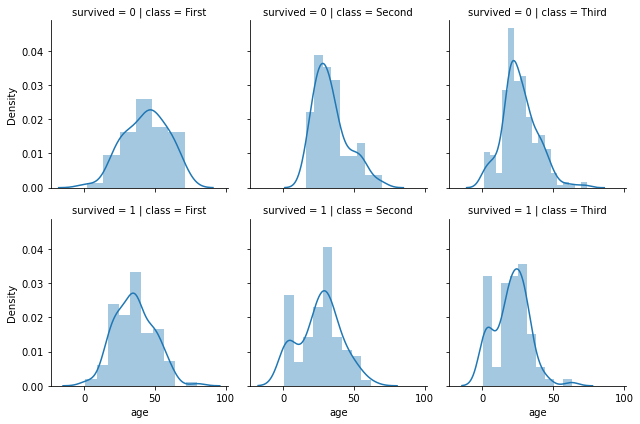

In [33]:
g = sns.FacetGrid(titanic, row='survived', col='class')
g.map(sns.distplot, 'age')

### 3.4 Density Plot

<AxesSubplot:ylabel='Density'>

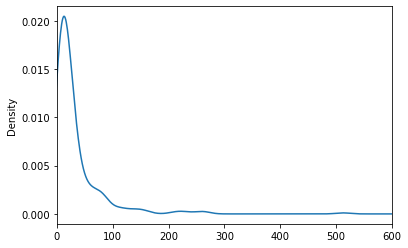

In [90]:
titanic.fare.dropna().plot(kind='kde', xlim=(0, 600))

### 3.5 Boxplots

<AxesSubplot:title={'center':'fare'}, xlabel='pclass'>

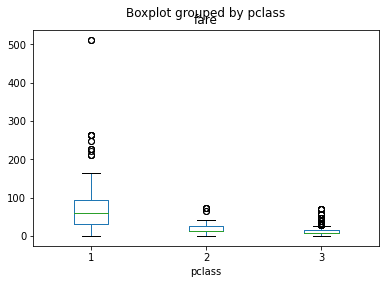

In [35]:
titanic.boxplot(column='fare', by='pclass', grid=False)

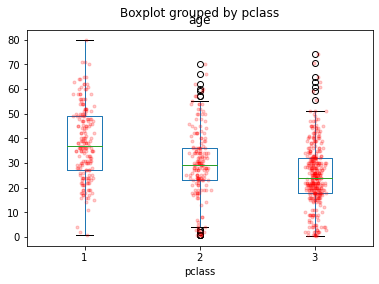

In [36]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1, 2, 3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random "fitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.2)

### 3.5 Boxplots - Dynamic Plot

<AxesSubplot:xlabel='pclass'>

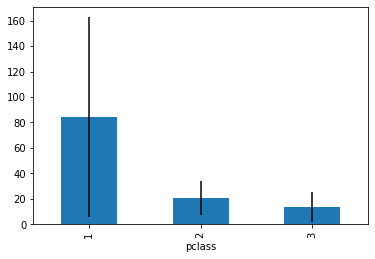

In [91]:
titanic.groupby('pclass')['fare'].mean().plot(kind='bar', yerr=titanic.groupby('pclass')['fare'].std())

<AxesSubplot:xlabel='pclass', ylabel='fare'>

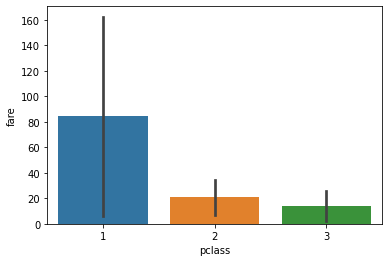

In [92]:
sns.barplot(x='pclass', y='fare', data=titanic, ci='sd')

<AxesSubplot:xlabel='pclass', ylabel='fare'>

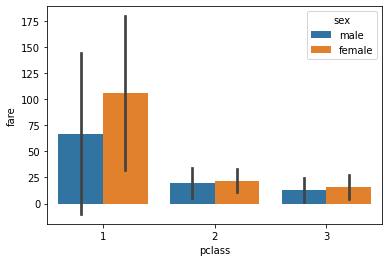

In [93]:
sns.barplot(x='pclass', y='fare', hue='sex', data=titanic, ci='sd')

### Combined Plot

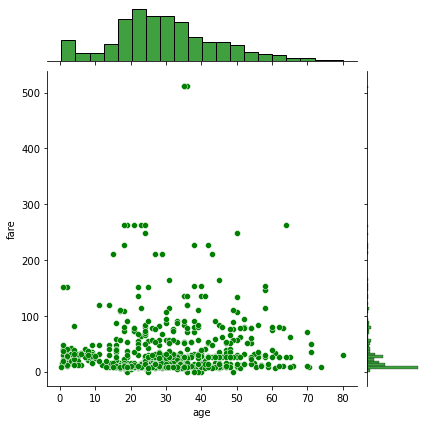

In [94]:
sns.jointplot(data=titanic, x='age', y='fare', color='g')

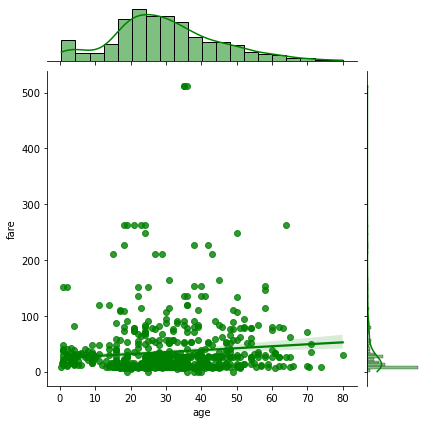

In [95]:
sns.jointplot(data=titanic, x='age', y='fare', kind='reg', color='g')

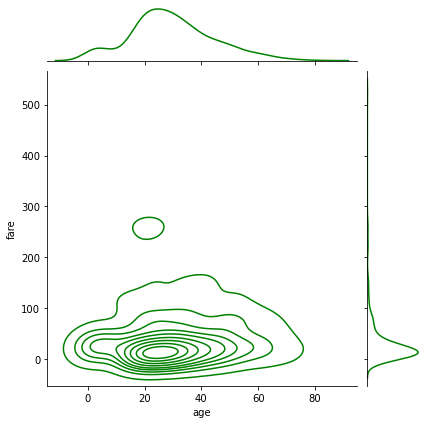

In [96]:
sns.jointplot(data=titanic, x='age', y='fare', kind='kde', color='g')

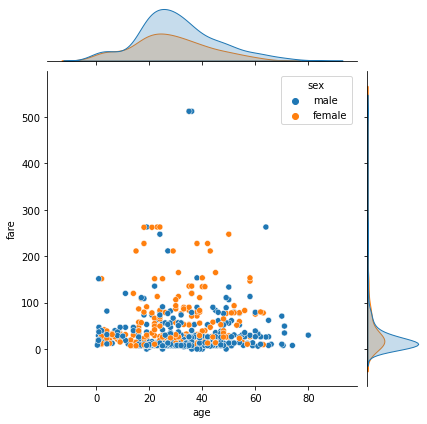

In [97]:
sns.jointplot(data=titanic, x='age', y='fare', hue='sex')

### 3.7 Heat Map

<AxesSubplot:xlabel='who', ylabel='embark_town'>

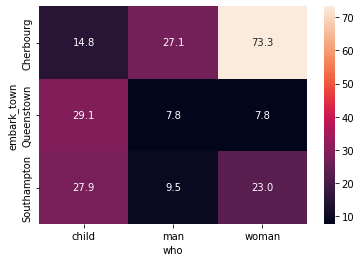

In [37]:
# Show an Annotated heatmap of the paid fares' median by groups of passengers
titanic_heat = titanic.pivot_table(index='embark_town', columns='who', values='fare', aggfunc=np.median)
sns.heatmap(titanic_heat, annot=True, fmt='.1f')

### 3.8 Correlation

In [38]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

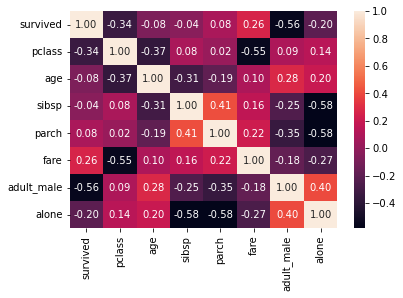

In [39]:
sns.heatmap(titanic.corr(), annot=True, fmt='.2f')

<AxesSubplot:>

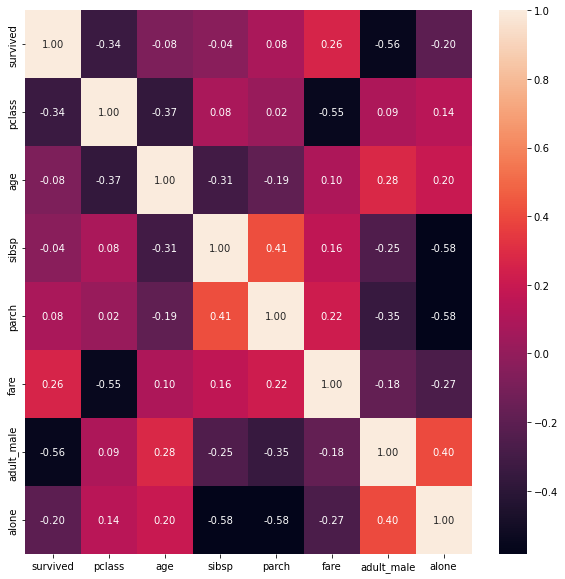

In [40]:
fig = plt.subplots(figsize=(10, 10))
sns.heatmap(titanic.corr(), annot=True, fmt='.2f')

### 3.9 Line Plots

In [43]:
Data = {'Year': [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010],
        'Unemployment_Rate': [9.8, 12, 8, 7.2, 6.9, 7, 6.5, 6.2, 5.5, 6.3]}
unemployment = pd.DataFrame(Data, columns=['Year', 'Unemployment_Rate'])
unemployment.head()

,Year,Unemployment_Rate
0,1920,9.8
1,1930,12.0
2,1940,8.0
3,1950,7.2
4,1960,6.9


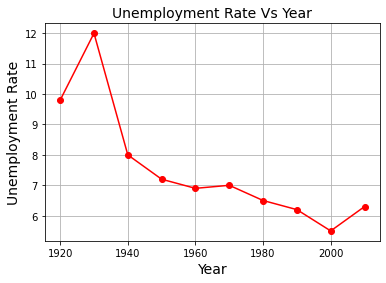

In [98]:
plt.plot(unemployment['Year'], unemployment['Unemployment_Rate'], color='red', marker='o')
plt.title('Unemployment Rate Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.grid(True)
plt.show()

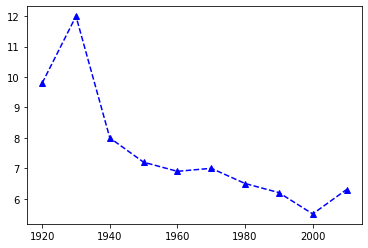

In [99]:
plt.plot(unemployment['Year'], unemployment['Unemployment_Rate'], color='blue', marker='^', ls='--')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


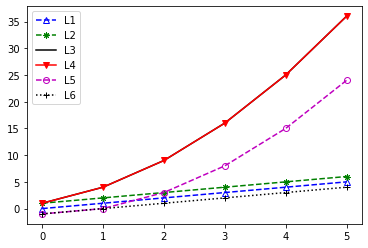

In [100]:
x = np.arange(6)

fig = plt.figure()
fig.show()
ax = fig.add_subplot(111)

ax.plot(x, x, c='b', marker='^', ls='--', label='L1', fillstyle='none')
ax.plot(x, x+1, c='g', marker=(8, 2, 0), ls='--', label='L2')
ax.plot(x, (x+1)**2, c='k', ls='-', label='L3')
ax.plot(x, (x+1)**2, c='r', marker='v', ls='-', label='L4')
ax.plot(x, x**2-1, c='m', marker='o', ls='--', label='L5', fillstyle='none')
ax.plot(x, x-1, c='k', marker='+', ls=':', label='L6')

plt.legend(loc=2)
plt.draw()

### 3.10 Scatter Plot

In [45]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

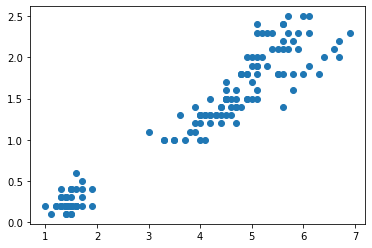

In [47]:
plt.scatter(iris.petal_length, iris.petal_width)

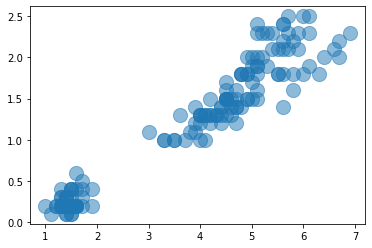

In [48]:
plt.scatter(iris.petal_length, iris.petal_width, s=200, alpha=0.5)

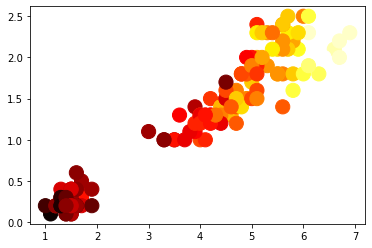

In [49]:
plt.scatter(iris.petal_length, iris.petal_width, c=iris.sepal_length, s=200, cmap='hot')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

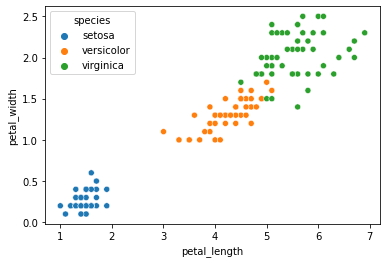

In [50]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

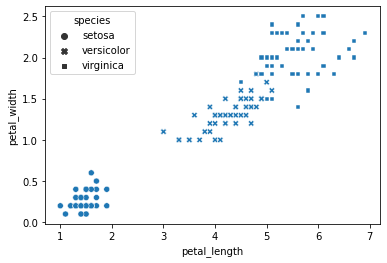

In [51]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', style='species')

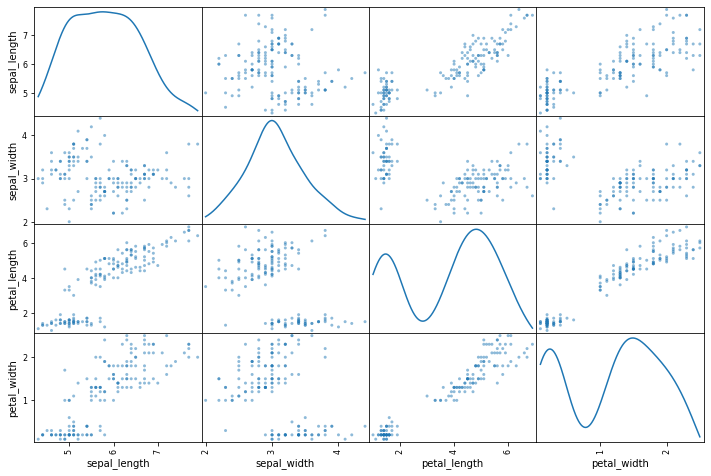

In [53]:
A = pd.plotting.scatter_matrix(iris.loc[:, 'sepal_length':'petal_width'], figsize=(12, 8), diagonal='kde')

### 3.11 Jupyter Notebook Exercises

In [101]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Q1.1**

<AxesSubplot:xlabel='color'>

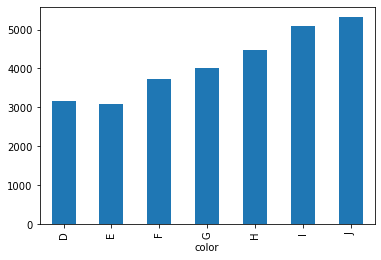

In [110]:
diamonds.groupby('color')['price'].mean().plot(kind='bar')

From the bar plot, we can see that the average price for color J is the highest, while the average price for color E is the lowest.

**Q2**

<AxesSubplot:ylabel='price'>

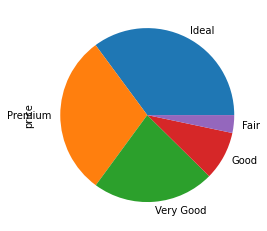

In [109]:
diamonds.groupby('cut')['price'].sum().plot(kind='pie')

In [111]:
diamonds.groupby('cut')['price'].sum()

cut
Ideal        74513487
Premium      63221498
Very Good    48107623
Good         19275009
Fair          7017600
Name: price, dtype: int64

From the pie chart, we can see that the total price for ideal cut is the highest, the total price for premium cut is the second highest, and the total price for fair is the lowest.

**Q3**

clarity           IF  VVS1  VVS2  VS1   VS2  SI1  SI2  I1
color cut                                                
D     Ideal       28   144   284  351   920  738  356  13
      Premium     10    40    94  131   339  556  421  12
      Very Good   23    52   141  175   309  494  314   5
      Good         9    13    25   43   104  237  223   8
      Fair         3     3     9    5    25   58   56   4
E     Ideal       79   335   507  593  1136  766  469  18
      Premium     27   105   121  292   629  614  519  30
      Very Good   43   170   298  293   503  626  445  22
      Good         9    43    52   89   160  355  202  23
      Fair         0     3    13   14    42   65   78   9
F     Ideal      268   440   520  616   879  608  453  42
      Premium     31    80   146  290   619  608  523  34
      Very Good   67   174   249  293   466  559  343  13
      Good        15    35    50  132   184  273  201  19
      Fair         4     5    10   33    53   83   89  35
G     Ideal      491   594   774  953   910  660  486  16
      Premium     87   171   275  566   721  566  492  46
      Very Good   79   190   302  432   479  474  327  16
      Good        22    41    75  152   192  207  163  19
      Fair         2     3    17   45    45   69   80  53
H     Ideal      226   326   289  467   556  763  450  38
      Premium     40   112   118  336   532  655  521  46
      Very Good   29   115   145  257   376  547  343  12
      Good         4    31    45   77   138  235  158  14
      Fair         0     1    11   32    41   75   91  52
I     Ideal       95   179   178  408   438  504  274  17
      Premium     23    84    82  221   315  367  312  24
      Very Good   19    69    71  205   274  358  200   8
      Good         6    22    26  103   110  165   81   9
      Fair         0     1     8   25    32   30   45  34
J     Ideal       25    29    54  201   232  243  110   2
      Premium     12    24    34  153   202  209  161  13
      Very Good    8    19    29  120   184  182  128   8
      Good         6     1    13   52    90   88   53   4
      Fair         0     1     1   16    23   28   27  23

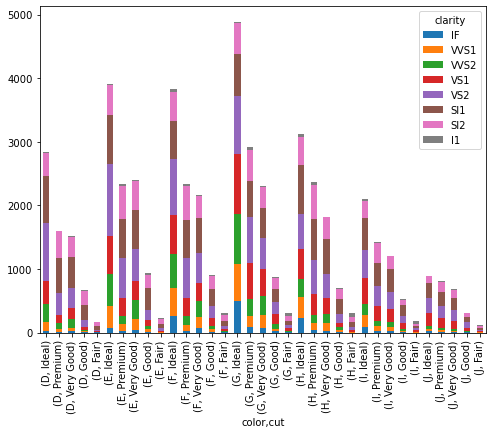

In [121]:
counts = pd.crosstab(index = [diamonds.color, diamonds.cut], columns = diamonds.clarity)
counts.plot(kind='bar', stacked=True, figsize=[8, 6])
counts

From the bar plot, we can see that there are most combination of diamonds for color G, cut Ideal, with different clarities, and there are little combination of diamonds for color D, cut Fair or color J, cut Fair with different clarities.

**Q4**

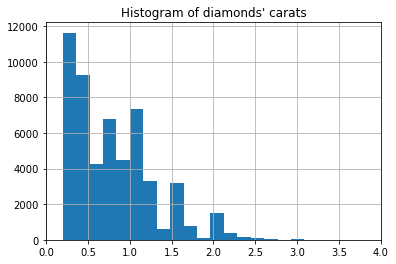

In [128]:
diamonds.carat.hist(grid=True, bins=30)
plt.xlim(0, 4)
plt.title('Histogram of diamonds\' carats')
plt.show()

From the histogram, we can see that most diamonds' carats are among 0 and 0.5, and little diamonds have carats among 2.5 and 3.0.

**Q5**

<AxesSubplot:title={'center':'price'}, xlabel='clarity'>

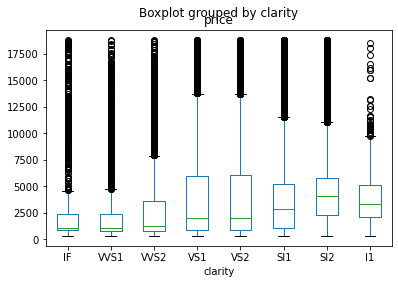

In [131]:
diamonds.boxplot(column='price', by='clarity', grid=False)

From the boxplot, we can see that the median price for diamonds of clarity SI2 is the highest, and the median price for diamonds of clarity IF and VVS1 are the two lowest. The price for diamonds of clarity VS1 and VS2 have the largest ranges of Q1 to Q3 quartile values, while the price for diamonds of clarity IF and VVS1 have the smallest ranges.

**Q6**

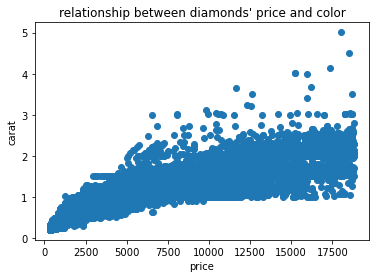

In [140]:
plt.scatter(diamonds.price, diamonds.carat)
plt.xlabel('price')
plt.ylabel('carat')
plt.title('relationship between diamonds\' price and color')
plt.show()

From the scatter plot, we can see that the price of diamond increases as the carat of diamond increases.

**Q7**

<AxesSubplot:xlabel='price', ylabel='carat'>

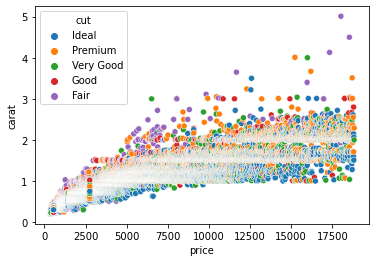

In [192]:
sns.scatterplot(data=diamonds, x='price', y='carat', hue='cut')

From the scatter plot, we can see that most diamonds with ideal cut are among 0 to 2 carats, and the price of the diamonds increases as the carat of the diamonds increases. Diamonds that have carats from 3 to 5 are mostly in the fair cut, similarly, the price of the diamonds increases as the carat of the diamonds increases.

**Q8**

<AxesSubplot:>

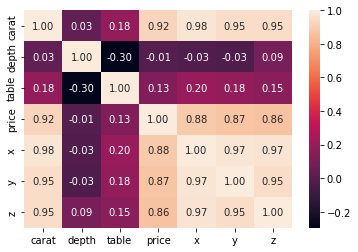

In [198]:
sns.heatmap(diamonds.corr(), annot=True, fmt='.2f')

From the correlation plot, we can see that carat is highly correlated with price, x, y, and z. depth has a weak negative correlation with table, and Price is also highly correlated with x, y, and z.

### 4. A little bit more about String - Chapter 8

In [54]:
s1 = 'happy'

In [55]:
s2 = 'birthday'

In [56]:
s1 += ' ' + s2

In [57]:
s1

'happy birthday'

In [58]:
symbol = '>'

In [59]:
symbol *= 5

In [60]:
symbol

'>>>>>'

### 4. Stipping Whitespace from Strings

**Removing Leading and Trailing Whitespace**

In [62]:
sentence = '\t  \n  This is a test string \t\t \n'

In [63]:
sentence.strip()

'This is a test string'

In [64]:
print(sentence)

	  
  This is a test string 		 



In [65]:
print(sentence.strip())

This is a test string


**Removing Leading Whitespace**

In [66]:
sentence.lstrip()

'This is a test string \t\t \n'

**Removing Trailing Whitespace**

In [67]:
sentence.rstrip()

'\t  \n  This is a test string'

### 4. Changing Character Case

**Capitalizing Only a String's First Character**

In [102]:
'happy birthday'.capitalize()

'Happy birthday'

**Capitalizing the First Character of Every Word in a String**

In [103]:
'strings: a deeper look'.title()

'Strings: A Deeper Look'

### 4. Replacing Substrings

In [68]:
values = '1\t2\t3\t4\t5'

In [69]:
values.replace('\t', ',')

'1,2,3,4,5'

In [70]:
values.replace('\t', ',', 3)

'1,2,3,4\t5'

### 4. Splitting and Joining Strings

**Spliting Strings**

In [75]:
letters = 'A, B, C, D'

In [72]:
letters.split(',')

['A', ' B', ' C', ' D']

In [73]:
letters.split(',', 2)

['A', ' B', ' C, D']

In [74]:
letters.rsplit(',', 2)

['A, B', ' C', ' D']

**Joining Strings**

In [76]:
letters_list = ['A', 'B', 'C', 'D']

In [77]:
','.join(letters_list)

'A,B,C,D'

In [78]:
','.join([str(i) for i in range(10)])

'0,1,2,3,4,5,6,7,8,9'

**String Methods partition and rpartition**

In [79]:
'Amanda: 89, 97, 92'.partition(': ')

('Amanda', ': ', '89, 97, 92')

In [80]:
url = 'http://www.deitel.com/books/PyCDS/table_of_contents.html'

In [81]:
rest_of_url, separator, document = url.rpartition('/')

In [82]:
document

'table_of_contents.html'

In [83]:
rest_of_url

'http://www.deitel.com/books/PyCDS'

**String Method splitlines**

In [84]:
lines = """This is line 1
This is line 2
This is line 3"""

In [85]:
lines

'This is line 1\nThis is line 2\nThis is line 3'

In [86]:
lines.splitlines()

['This is line 1', 'This is line 2', 'This is line 3']

In [87]:
lines.splitlines(True)

['This is line 1\n', 'This is line 2\n', 'This is line 3']